# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# Beginning of Analysis

The plan is as follows: 

First we import the seaborn and pandas packages.
Next we read in the data as a dataframe through pd.read_csv. 
We then take an initial look at the dataset and verify that there are no null values that need to be addressed

1.) To determine if the temperature data adheres to a normal distribution we will use a graphical method to compare our data to the a standard normal curve with the same mean and standard deviation. 

2.) The sample size is not especially large (130 patients, 3 rows [temperature, gender, and heart rate]). Meanwhile the patients appear to be independent of one another. However, if the patients were all taken from the same major city (Grand Rapids Michigan) it's possible that they share a culture, diet, lifestyle, etc that does not apply worldwide. But for the purposes of this exercise, we can apply the Central Limit Theorem.

3.) We will use a one sample test as we are comparing a data set to singular number (We would use a two sample test if we were comparing this data set to the data set that yielded the 98.6 mean). It would be appropriate to use a t statistic here as we were not given the standard deviation of the population that generated the 98.6 mean. Analysis of the results of a z-test will be included in the section with the z statistic.

4.) We would prefer to use the t statistic here for the small sample size, and would use a one-sample test.

5.) We would consider a temperature abnormal if it lies outside of a 95% confidence interval. Specific results will be included in the comments for that section of code.

6.) Information about differences between male and female temperatures will be conducted using a swarm plot and comparing CDFs.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('data/human_body_temperature.csv')

# Take a first look at the data
# Uncomment the line below to view the entire data set.
# df 
df.head()

# Check for null values
df.isnull().any().any() 

False

# Question 1 (Determine Normality):
To determine if the temperature data adheres to a normal distribution we will use a graphical method to compare our data to the a standard normal curve with the same mean and standard deviation. By plotting the CDF we are able to conclude that the distribution follows a normal curve.

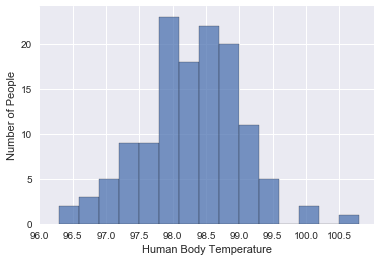

In [2]:
# Set default Seaborn style
sns.set()

# Make the temperature column an array
tempArray = np.asarray(df.temperature)
# Plot histogram of temperature
plt.hist(tempArray, bins = 15, alpha=0.75, histtype='bar', ec='black')
plt.xticks(np.arange(96, 101, step=0.5))
plt.xlabel('Human Body Temperature')
plt.ylabel('Number of People')

# Show histogram
plt.show()

In [3]:
# Implement the bootstrapping functions from the Datacamp Course: Statistical Thinking in Python (Part 1)
# Author: Justin Bois
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

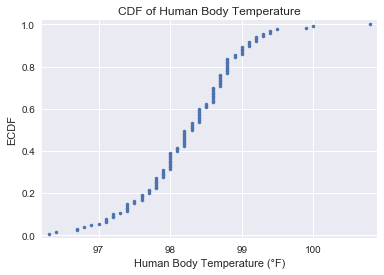

[ 96.7225  97.8     98.3     98.7     99.4775]


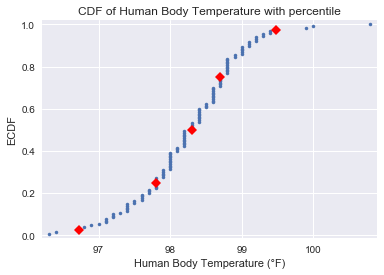

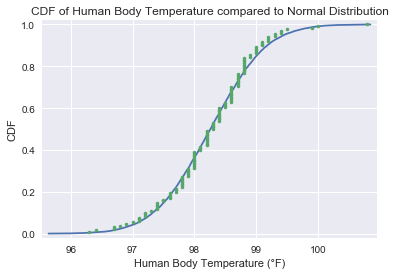

In [4]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_temp, y_temp = ecdf(tempArray)

# Generate plot
_ = plt.plot(x_temp, y_temp, marker = '.', linestyle = 'none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.title('CDF of Human Body Temperature')
_ = plt.xlabel('Human Body Temperature (°F)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()
plt.clf()

# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_temp = np.percentile(tempArray, percentiles)

# Print the result
print(ptiles_temp)


# Plot the ECDF
_ = plt.plot(x_temp, y_temp, '.')
_ = plt.title('CDF of Human Body Temperature with percentile')
plt.margins(0.02)
_ = plt.xlabel('Human Body Temperature (°F)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_temp, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()
plt.clf()

# Compute mean and standard deviation: mu, sigma
mu = np.mean(tempArray)
sigma = np.std(tempArray)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(tempArray)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.title('CDF of Human Body Temperature compared to Normal Distribution')
_ = plt.xlabel('Human Body Temperature (°F)')
_ = plt.ylabel('CDF')
plt.show()

# There is fairly convincing evidence that the data is normally distributed.

# Question 2 was answered in the preliminary observation section.

# Question 3 (Hypothesis Testing): 
By conducting a single sample hypothesis test on the null hypothesis that the true mean is 98.6 °F we arrived at a 0.0 p value and successfully reject the null hypothesis. This suggests that the true mean is not 98.6 °F. 

Without being given the population standard deviation for the data set that yielded the 98.6 °F mean the z-statistic returns the same value as the t-statistic as we assume the population standard deviation is the same as the sample standard deviation. That being said, both results were less than 0.05, again lending to the argument against the null hypothesis.

In [5]:
# Implement the bootstrapping functions from the Datacamp Course: Statistical Thinking in Python (Part 2)
# Author: Justin Bois
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2)) 

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

0.0643972147617


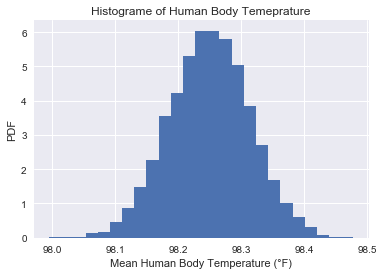

In [6]:
# Calculate and plot standard error of the mean
bsTemp_reps = draw_bs_reps(tempArray, np.mean, 10000)
sem = np.std(tempArray) / np.sqrt(len(tempArray))
bsTemp_std = np.std(bsTemp_reps)
print(bsTemp_std)

plt.title('Histograme of Human Body Temeprature')
plt.hist(bsTemp_reps, bins = 25, normed = True)
plt.xlabel('Mean Human Body Temperature (°F)')
plt.ylabel('PDF')
plt.show()

In [7]:
# One sample test 
# Null hypothesis. The true mean is 98.6


# Make an array of translated temperatures: translated_temps
translated_temps = tempArray - np.mean(tempArray) + 98.6

# Take bootstrap replicates of body temperatures: temp_replicates
temp_replicates = draw_bs_reps(translated_temps, np.mean, 10000)

# Compute fraction of replicates that are less than the observed temperatures: p
p = np.sum(temp_replicates <= np.mean(tempArray)) / 10000

# Print the p-value
print('p = ', p)

# t-test work 
sample_mean = np.mean(tempArray) 
sample_std  = np.std(tempArray)
sample_size = len(tempArray)
mu_0 = 98.6

t_statistic = (sample_mean - mu_0) / (sample_std / sample_size**0.5)

from scipy import stats
# Multiply by two for the two tailed test
t_result = stats.norm.sf(abs(t_statistic))*2

print('t statistic = ', t_result)
# Since this is significantly under 0.05, we reject the null hypothesis that the true mean is 98.6


# To conduct a z test we assume the population std is the same as the sample std
population_std = sample_std
z_statistic = (sample_mean - mu_0) / (population_std / sample_size**0.5)
z_statistic
z_result = stats.norm.sf(abs(z_statistic))*2
print('z statistic = ', z_result)
# Since this is significantly under 0.05, we reject the null hypothesis that the true mean is 98.6


p =  0.0
t statistic =  4.35231516587e-08
z statistic =  4.35231516587e-08


# Question 4 (Small subsample): 
We take a 10 item set of the data, conduct a one sample test, and apply a t-test. With a sample size this small the Central Limit Theorem does not apply and we arrive at p value hovering around 0.5, far too large to reject the null hypothesis. More interesting is the wild variance in the t and z statistics. From run to run they vary from as low as 0.006 to as high as 0.68. Again, this is due to the potential for high variance amongst items in a small sample size.

In [27]:
# One sample test **with small sample**
# Null hypothesis. The true mean is 98.6

# Randomly select a size 10 array: 
small_temp = np.random.choice(tempArray, size=10, replace=True)
    
# Make an array of translated temperatures: translated_temps
small_translated_temps = small_temp - np.mean(small_temp) + 98.6

# Take bootstrap replicates of body temperatures: temp_replicates
small_temp_replicates = draw_bs_reps(small_translated_temps, np.mean, 10000)

# Compute fraction of replicates that are less than the observed temperatures: p
p = np.sum(small_temp_replicates <= np.mean(small_translated_temps)) / 10000

# Print the p-value
print('p = ', p)
print('Since the p value is > 0.05 we fail to reject the null hypothesis')
print('\n')

# t-test work 
sample_mean = np.mean(small_temp) 
sample_std  = np.std(small_temp)
sample_size = len(small_temp)
mu_0 = 98.6

small_t_statistic = (sample_mean - mu_0) / (sample_std / sample_size**0.5)

from scipy import stats
# Multiply by two for the two tailed test
t_result = stats.norm.sf(abs(small_t_statistic))*2

print('t statistic = ', t_result)
# Since this greater than 0.05, we fail to reject the null hypothesis that the true mean is 98.6


# To conduct a z test we assume the population std is the same as the sample std
population_std = sample_std
z_statistic = (sample_mean - mu_0) / (population_std / sample_size**0.5)
z_statistic
z_result = stats.norm.sf(abs(z_statistic))*2
print('z statistic = ', z_result)
# Since this greater than 0.05, we fail to reject the null hypothesis that the true mean is 98.6
# The t and z statistics vary wildly from run to run of the code, due to the volatility in the small sample size. 
# A 10 unit sample size is too small to work with the Central Limit Theorem, making these t-test and z-test values
# unreliable.

p =  0.5045
Since the p value is > 0.05 we fail to reject the null hypothesis


t statistic =  0.687523362241
z statistic =  0.687523362241


# Question 5 (Outlier Detection): 
We determine outliers by determining a 95% confidence interval based on the normal distribution. 

In [10]:
# Calculate and plot standard error of the mean
bsTemp_reps = draw_bs_reps(tempArray, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bsTemp_reps, [2.5, 97.5])

# Print the confidence interval
print('Values outside of the range: ', conf_int, ' are considered abnormal')

Values outside of the range:  [ 98.12153846  98.37461538]  are considered abnormal


# Question 6 (Gender's Effect on Body Temperature): 
A swarmplot, two sample hypothesis test, and a graphical approach showcases an interesting difference between average body temperature amongst genders.

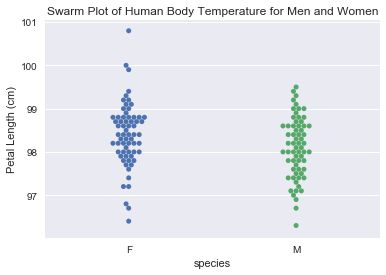

p-value = 0.0111


In [18]:
# Generate a swarm plot of Male and Female average body temperatures.
sns.swarmplot(x = 'gender', y = 'temperature', data = df)

# Label the axes
plt.title('Swarm Plot of Human Body Temperature for Men and Women')
plt.xlabel('species')
plt.ylabel('Petal Length (cm)')

# Show the plot
plt.show() 
plt.clf()

# The swarm plot leads one to believe the distributions could be slightly different.
# Test if men and women have the same mean body temperature
# Null hypothesis: male and female temperature distributions have the same mean.

# Separate df in MaleTemp and FemaleTemp
femaleTemp = df['temperature'].loc[df['gender'] == 'F']
maleTemp   = df['temperature'].loc[df['gender'] == 'M']

# Caluculate the difference in means
temp_mean_diff = np.mean(femaleTemp) - np.mean(maleTemp)


# Concatenate body temperatures: temp_concat
temp_concat = np.concatenate((femaleTemp, maleTemp))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(temp_concat, size=len(temp_concat))
    
    # Compute replicate
    bs_replicates[i] = np.mean(bs_sample[:len(femaleTemp)]) - np.mean(
                                     bs_sample[len(maleTemp):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= temp_mean_diff) / len(bs_replicates)
print('p-value =', p)

# With a p-value <0.05 we reject the null hypothesis. Thus, the male and female populations have different means.


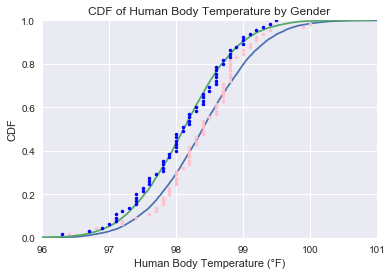

A short summary is provided in the readme file within the associated repository.


In [28]:
# Plot both cdfs
# Compute mean and standard deviation: mu, sigma
mu_female = np.mean(femaleTemp)
sigma_female = np.std(femaleTemp)

mu_male = np.mean(maleTemp)
sigma_male = np.std(maleTemp)

# Sample out of a normal distribution with this mu and sigma: samples
samples_female = np.random.normal(mu_female, sigma_female, size = 10000)
samples_male   = np.random.normal(mu_male  , sigma_male, size = 10000)

# Get the CDF of the samples and of the data
xF_theor, yF_theor = ecdf(samples_female)
xM_theor, yM_theor = ecdf(samples_male)
xF, yF = ecdf(femaleTemp)
xM, yM = ecdf(maleTemp)

# Plot the CDFs and show the plot
_ = plt.plot(xF_theor, yF_theor)
_ = plt.plot(xF, yF, marker='.', linestyle='none', color = 'pink')
_ = plt.axis([96, 101, 0, 1])
_ = plt.plot(xM_theor, yM_theor)
_ = plt.plot(xM, yM, marker='.', linestyle='none', color = 'blue')
plt.margins(0.02)
_ = plt.title('CDF of Human Body Temperature by Gender')
_ = plt.xlabel('Human Body Temperature (°F)')
_ = plt.ylabel('CDF')
plt.show()
plt.clf()

# These two distributions are clearly distinct from one another.

print('A short summary is provided in the readme file within the associated repository.')